# MarketProphet

## Data Exploration and Preprocessing:

### Loading the dataset.

In [260]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [261]:
data_frame = pd.read_csv('E:\\University\\Machine Learning\\Asignments\\Serie 3\\ECommerce_consumer behaviour.csv')

data = data_frame.copy()

data_frame

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


### Data understanding

In [262]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


lets check for null values

In [263]:
data_frame.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

we can see the large amount of null value in 'days_since_prior_order'
Now we will remove these null values 

In [264]:
data_frame['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [265]:
for col in data_frame.columns:
    if data_frame[col].dtypes  == 'float64':        
        data_frame[col].fillna(-1, inplace=True )

In [266]:
data_frame.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [267]:
data_frame['days_since_prior_order'] = data_frame['days_since_prior_order'].astype(np.int64)

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


### Data Preparation

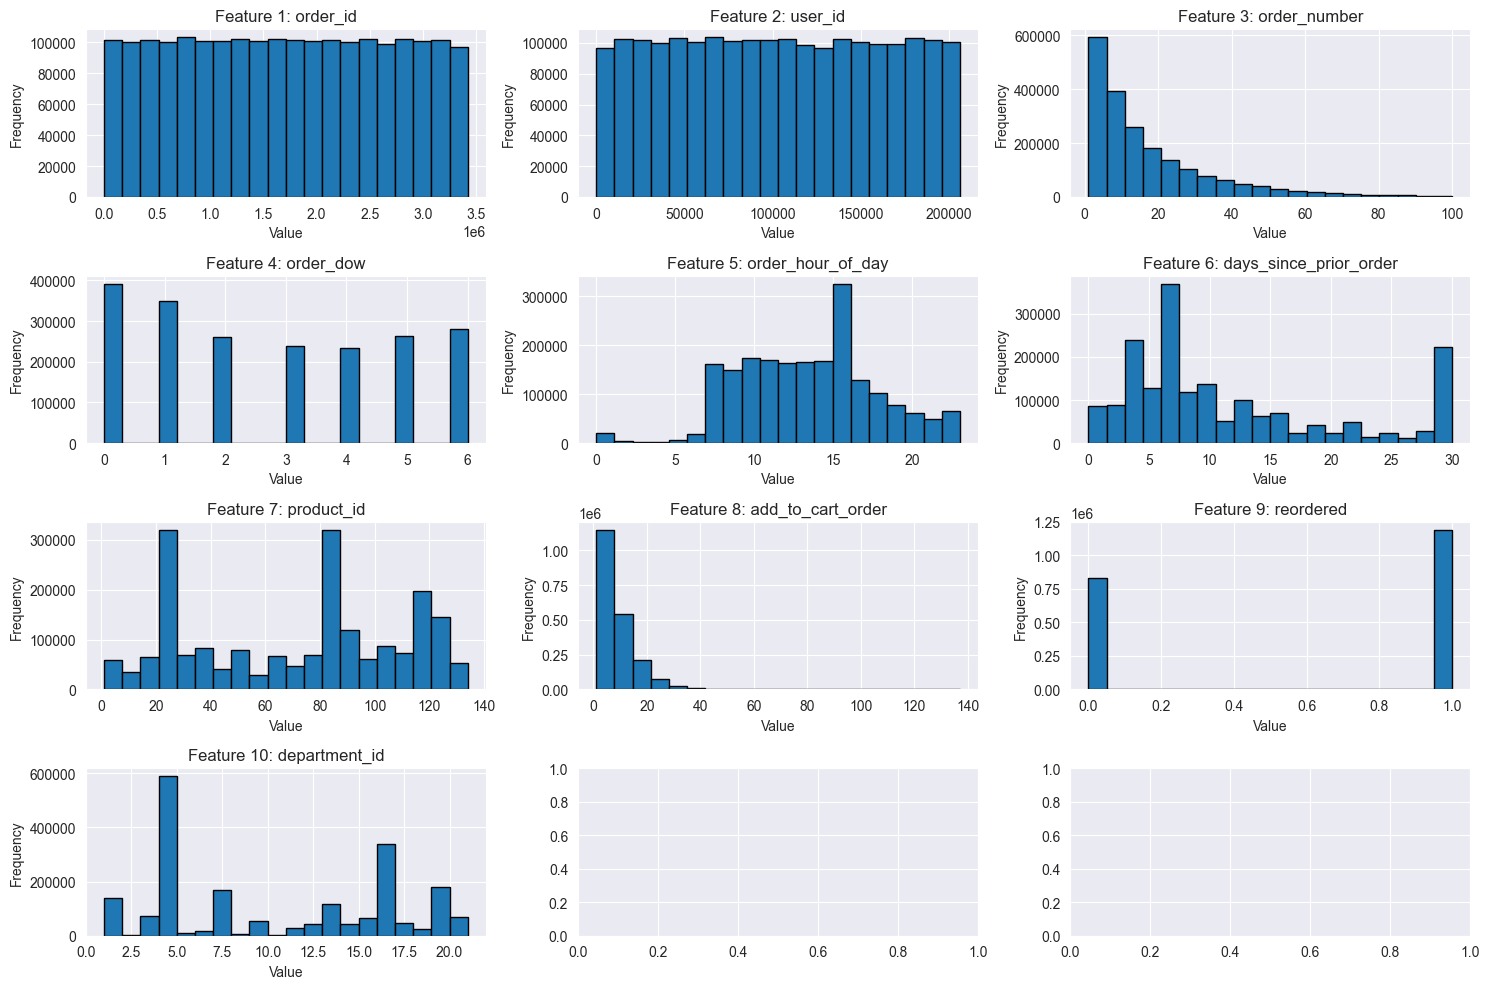

In [268]:
import matplotlib.pyplot as plt

feature_names = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id'
                 , 'add_to_cart_order', 'reordered', 'department_id']

num_features = 10
num_rows = int(num_features/3) + (num_features % 3 > 0)
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(range(num_features)):
    axes[i].hist(data.iloc[:, feature], bins=20, edgecolor='black')
    axes[i].set_title(f'Feature {feature+1}: {feature_names[feature]}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


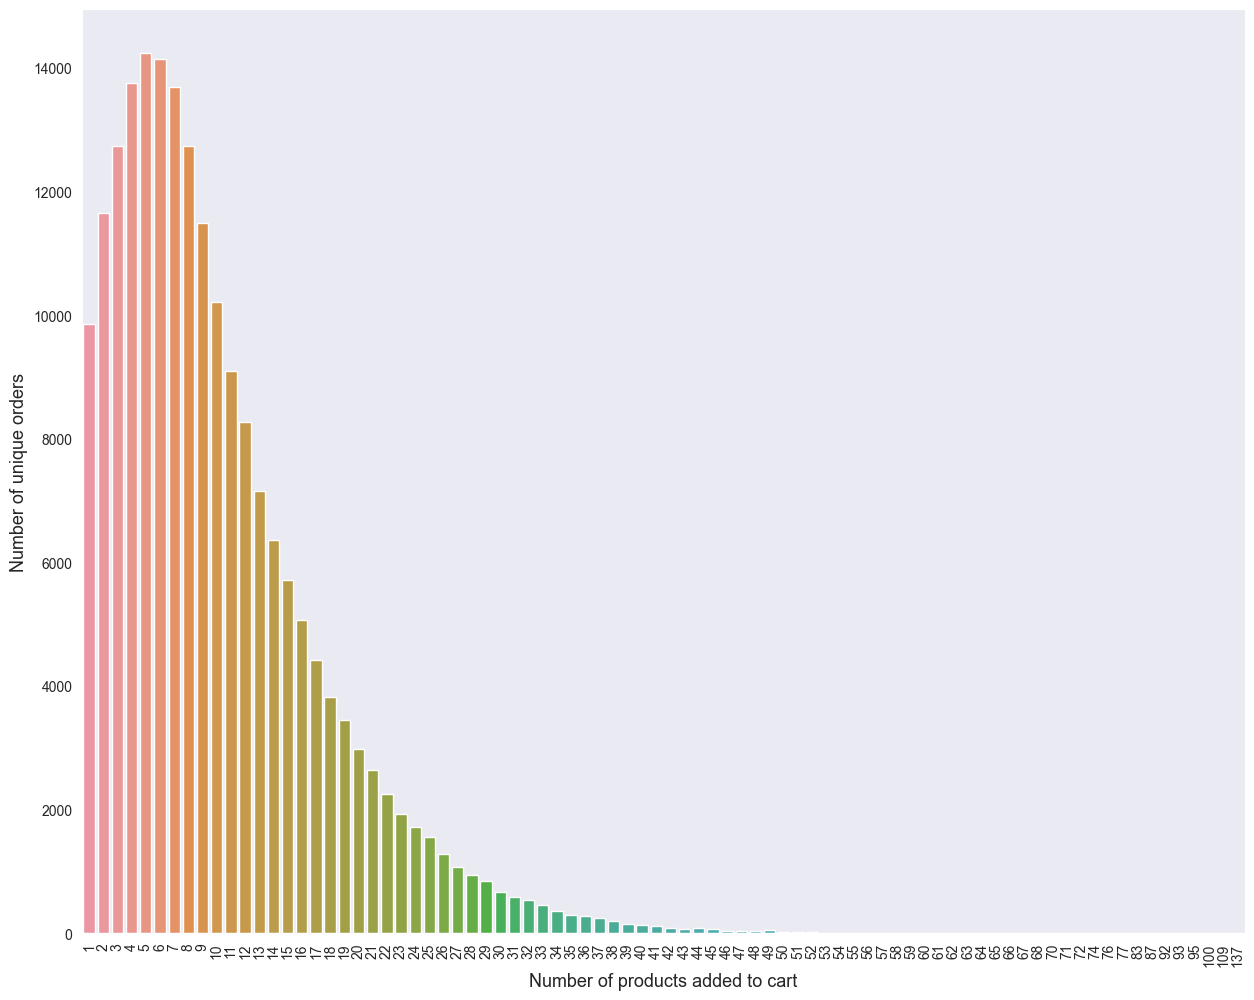

In [269]:
grouped = data_frame.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)  # Specify x and y explicitly

sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()


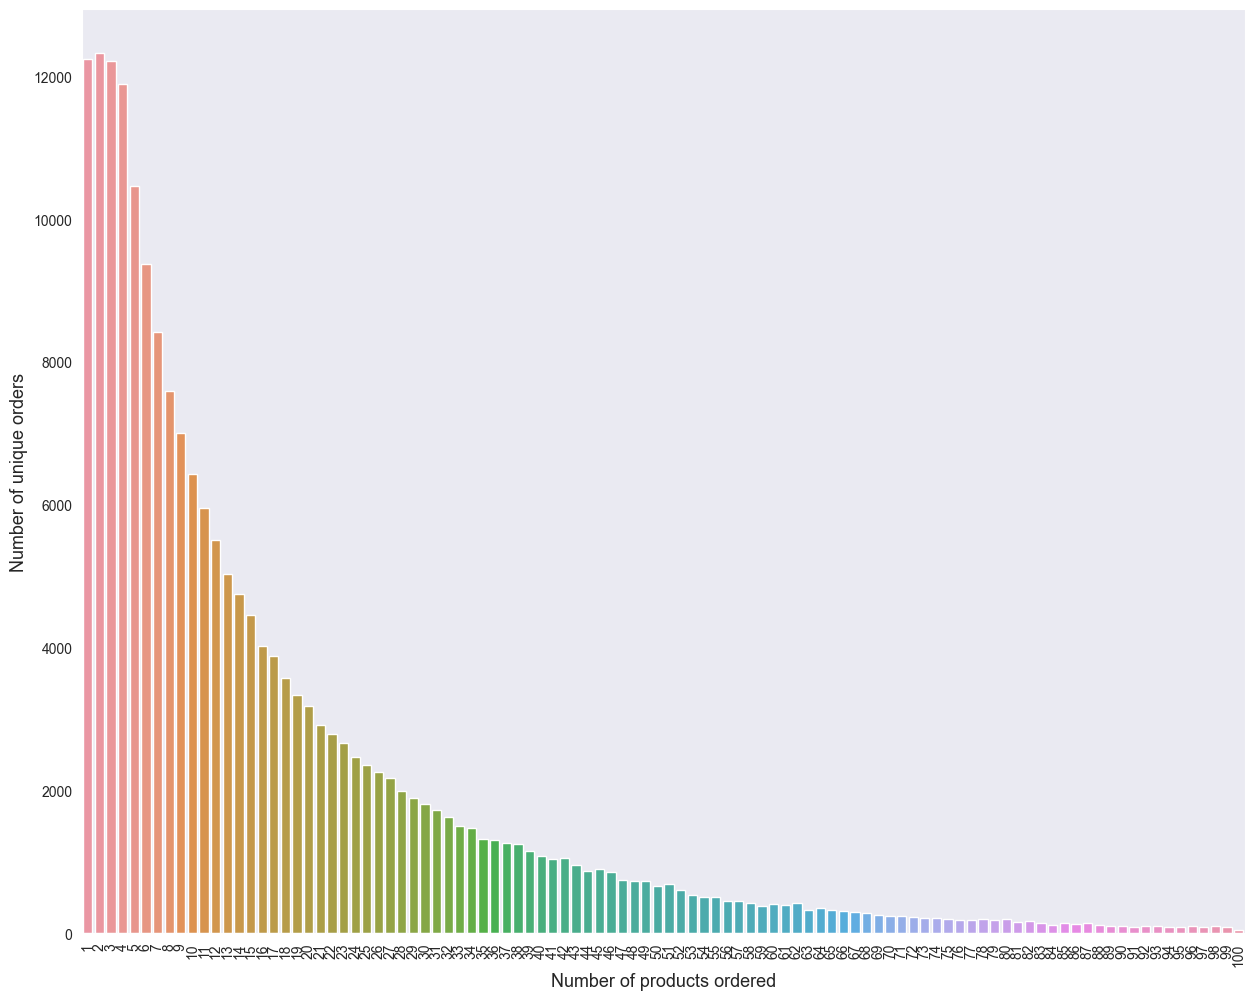

In [270]:
grouped = data_frame.groupby("order_id")["order_number"].aggregate("max").reset_index()
grouped = grouped.order_number.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)  # Specify x and y explicitly

sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products ordered', fontsize=13)
plt.show()


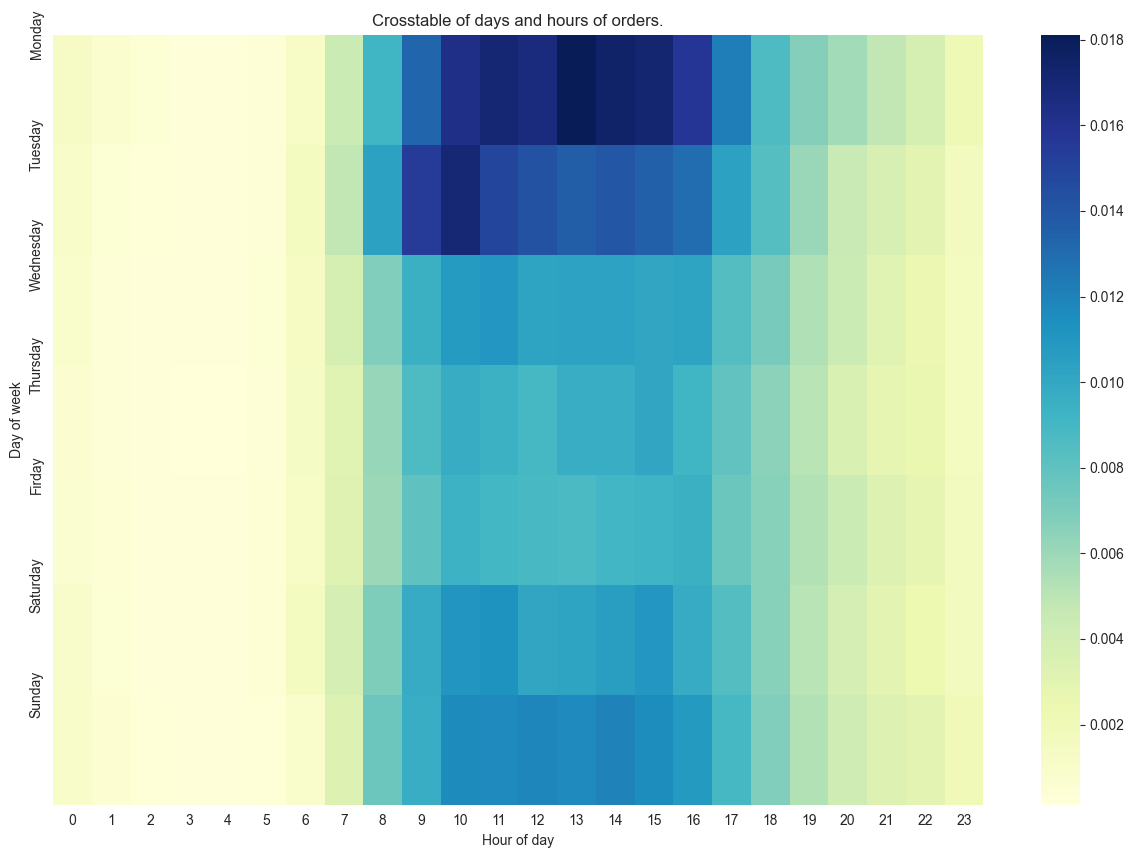

In [271]:
grouped = data_frame.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
grouped = data_frame.pivot_table(index="order_dow", columns="order_hour_of_day", values="order_number", aggfunc="count") / data_frame.shape[0]

plt.figure(figsize=(15, 10))
sns.heatmap(grouped, cmap='YlGnBu')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Firday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.ylabel("Day of week")
plt.xlabel("Hour of day")
plt.title("Crosstable of days and hours of orders.")

plt.show()

C:\Users\alireza\AppData\Local\Temp\ipykernel_16572\3891737946.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)


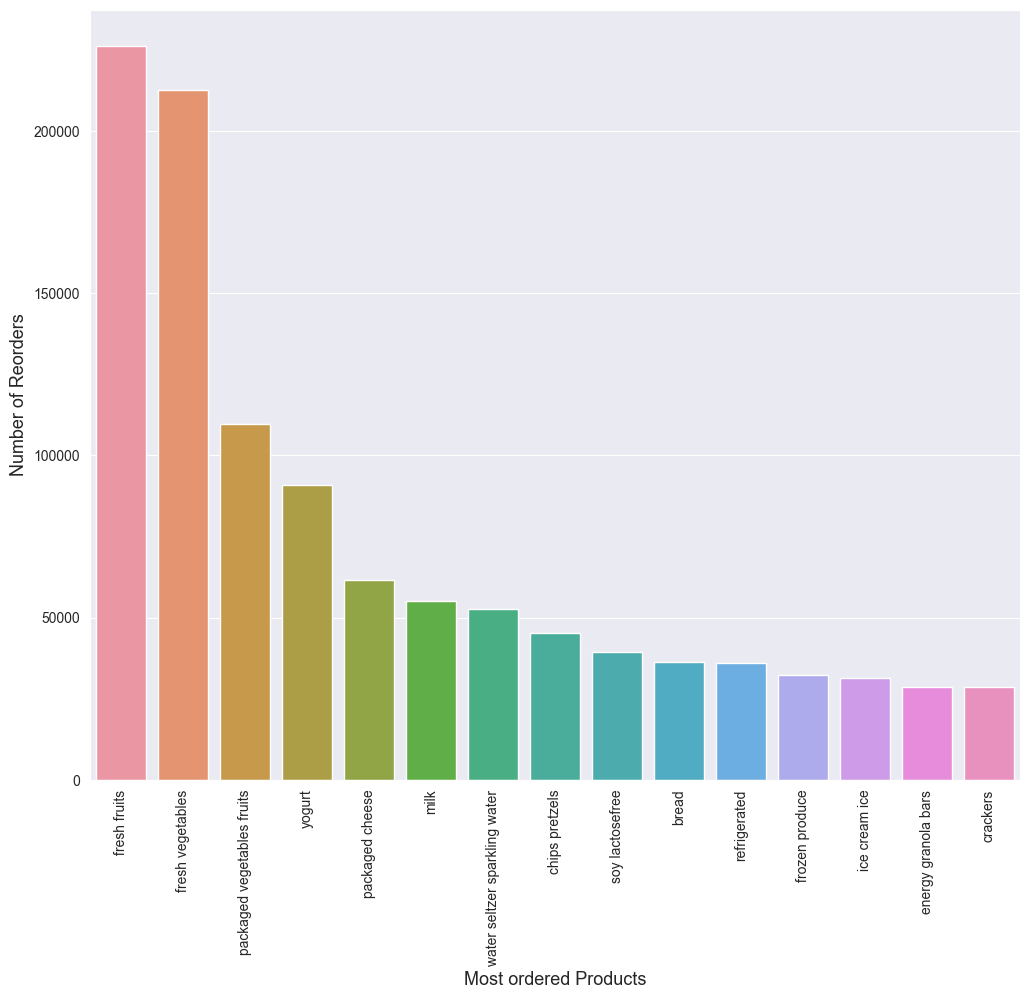

In [272]:
grouped = data_frame.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()

grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

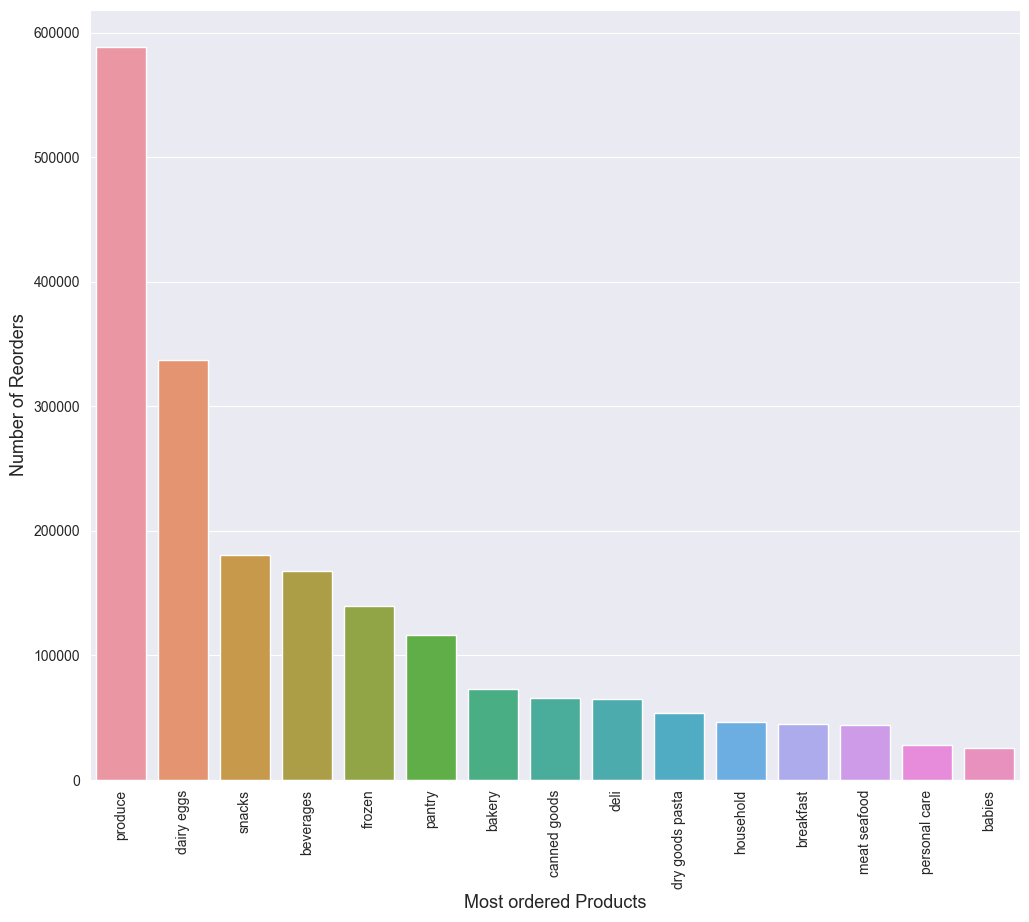

In [273]:
grouped = data_frame.groupby(["department"])["order_id"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='order_id', ascending=False)[:15].reset_index()

grouped  = grouped.groupby(['department']).sum()['order_id'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

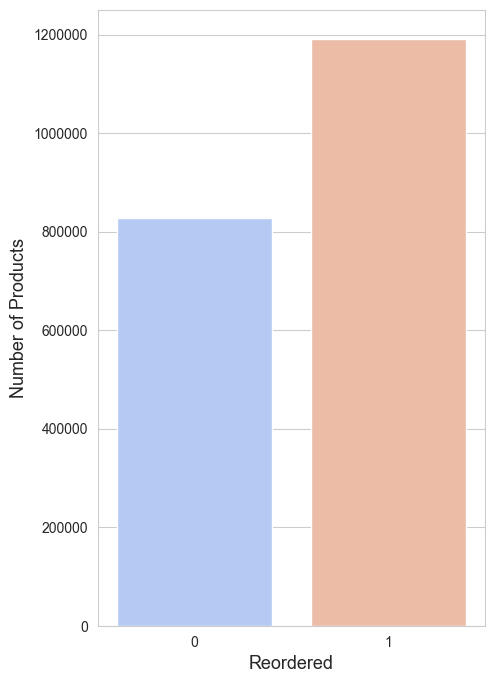

In [274]:
grouped = data_frame.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped  = grouped.groupby(["reordered"]).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Preprocess the data :

handle categorical variables (encode using one-hot encoding) and normalize or scale numerical features (e.g., using StandardScaler).

In [275]:
data_frame = pd.get_dummies(data_frame)

Normalize or Scale Numerical Features:

In [276]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_frame = scaler.fit_transform(data_frame)

### Modeling

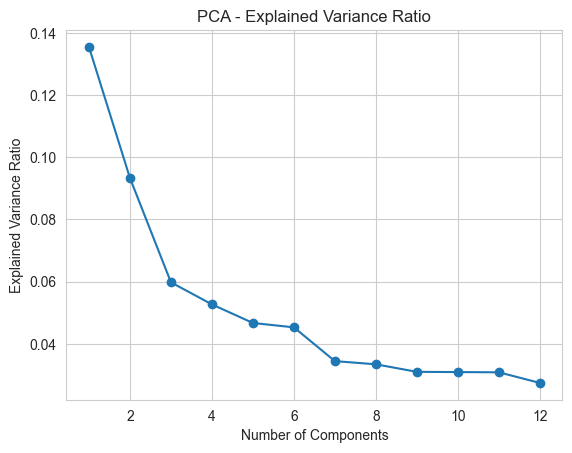

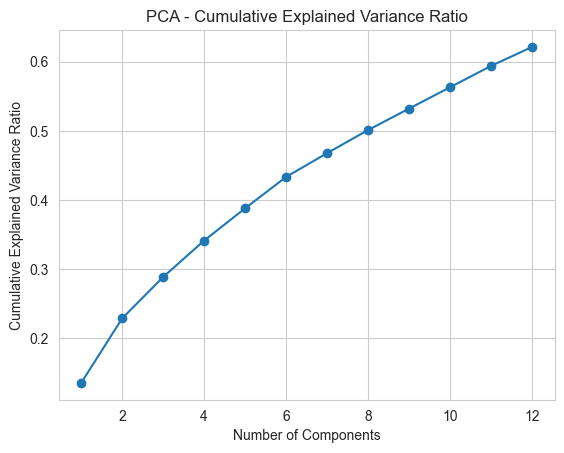

In [277]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=12)

pca.fit(data_frame)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.plot(range(1, 12 + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.show()

# Plot the cumulative explained variance ratio
plt.plot(range(1, 12 + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()


In [278]:
from sklearn.decomposition import PCA

num_components = 3 # best value 
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_frame)

c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

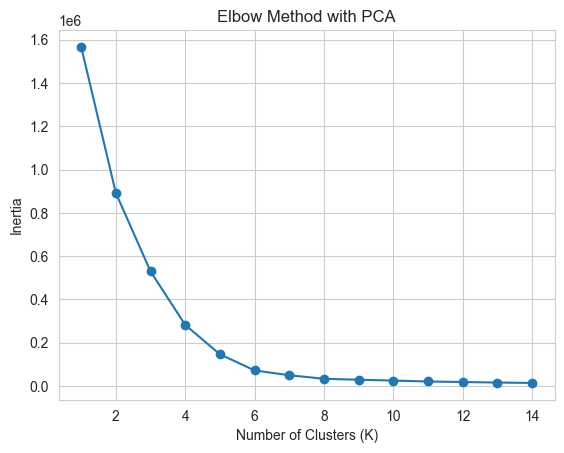

In [279]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize empty lists to store the K values and corresponding inertia values
k_values = []
inertia_values = []

# Iterate over different K values
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    k_values.append(k)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against K values
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method with PCA')
plt.show()


In [282]:
sample_size = 10000  # Specify the desired sample size

# Randomly select a subset of data
subset_indices = np.random.choice(data_frame.shape[0], size=sample_size, replace=False)
subset = data_frame[subset_indices]

num_components = 3 # best value 
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(subset)

c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

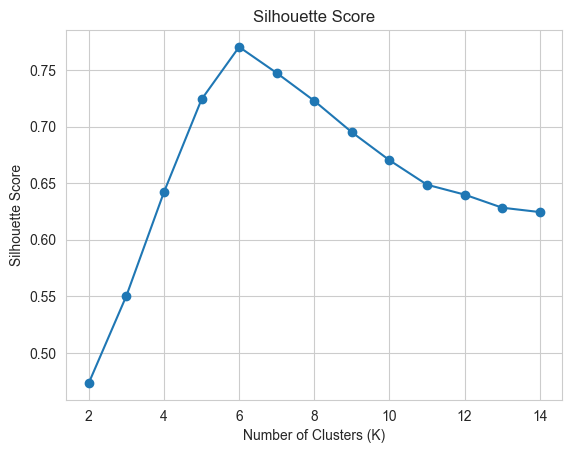

In [283]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize empty lists to store the K values and corresponding silhouette scores
k_values = []
silhouette_scores = []

# Iterate over different K values
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    k_values.append(k)
    silhouette_scores.append(silhouette_score(data_pca, kmeans.labels_))

# Plot the silhouette scores against K values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


In [284]:
best_k = 6

In [285]:
sample_size = 100000  # Specify the desired sample size

# Randomly select a subset of data
subset_indices = np.random.choice(data_frame.shape[0], size=sample_size, replace=False)
subset = data_frame[subset_indices]

num_components = 3 # best value 
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(subset)

In [286]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

num_components = 3 # best value 
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(subset)

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(data_pca)
inertia_value = kmeans.inertia_
silhouette_score = silhouette_score(data_pca, kmeans.labels_)


# Fit K-means to the data and obtain cluster labels
cluster_labels = kmeans.fit_predict(data_pca)

print(f'silhouette_score : {silhouette_score}')
print(f'elbow : {inertia_value}')

c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_score : 0.7862437407726889
elbow : 3538.03006695053


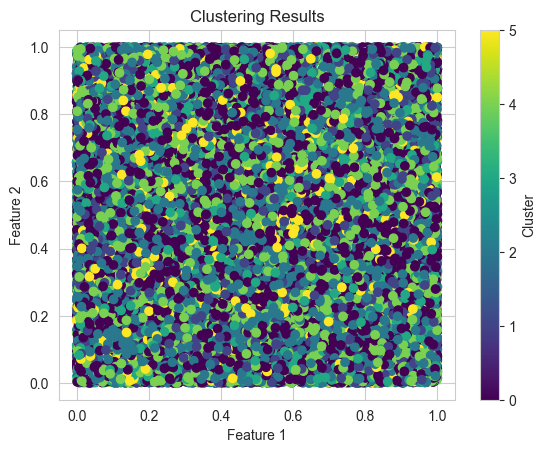

In [289]:
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
# Assuming 'cluster_labels' is the array of assigned cluster labels

# Plot the data points colored by cluster labels
plt.scatter(subset[:, 0], subset
            [:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

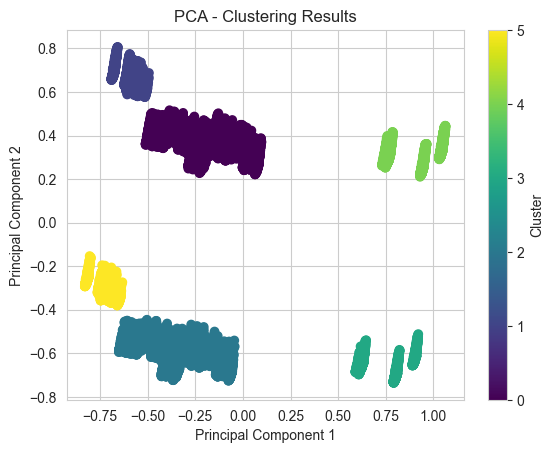

In [288]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

#### Dbscan

In [293]:
from sklearn.cluster import DBSCAN

num_components = 3 # best value 
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(subset)

# Initialize DBSCAN with desired parameters
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit DBSCAN to the data and obtain cluster labels
cluster_labels = dbscan.fit_predict(data_pca)

In [299]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_pca, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.10917322886157779


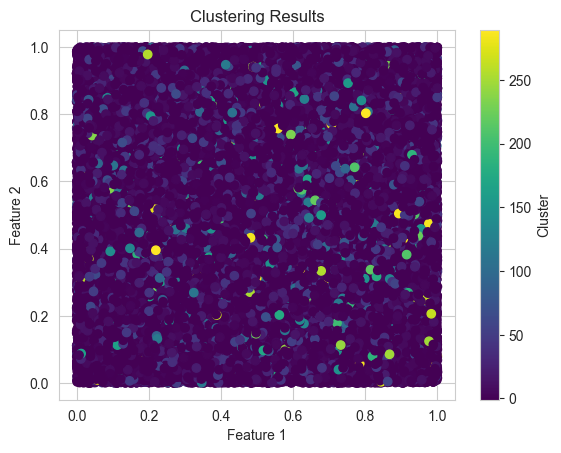

In [300]:
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
# Assuming 'cluster_labels' is the array of assigned cluster labels

# Plot the data points colored by cluster labels
plt.scatter(subset[:, 0], subset
            [:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

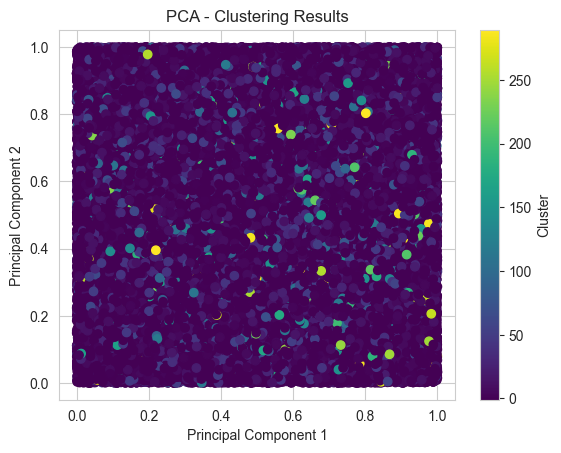

In [301]:
plt.scatter(subset[:, 0], subset[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

#### Hierarchical Clustering:

In [302]:
from sklearn.cluster import AgglomerativeClustering

num_components = 3 # best value 
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(subset)

# Assuming 'data' is your dataset
data = data_pca

# Initialize hierarchical clustering with desired parameters
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit hierarchical clustering to the data and obtain cluster labels
cluster_labels = hierarchical.fit_predict(data)

c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
# Assuming 'cluster_labels' is the array of assigned cluster labels

# Plot the data points colored by cluster labels
plt.scatter(data_frame[:, 0], data_frame
            [:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Clustering Results')
plt.colorbar(label='Cluster')
plt.show()